In [4]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ----- ---------------------------------- 0.5/4.1 MB 3.4 MB/s eta 0:00:02
     ------------ --------------------------- 1.3/4.1 MB 3.2 MB/s eta 0:00:01
     ----------------- ---------------------- 1.8/4.1 MB 3.2 MB/s eta 0:00:01
     ------------------------- -------------- 2.6/4.1 MB 3.4 MB/s eta 0:00:01
     --------------------------------- ------ 3.4/4.1 MB 3.4 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4

In [6]:
pip install opencv-python pycocotools

In [8]:
pip install git+https://github.com/facebookresearch/detectron2.git


  Cloning https://github.com/facebookresearch/detectron2.git to c:\users\pacay\appdata\local\temp\pip-req-build-hh4apx5j
  Resolved https://github.com/facebookresearch/detectron2.git to commit 65184fc057d4fab080a98564f6b60fae0b94edc4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp39-cp39-win_amd64.whl size=884052 sha256=c3e8666ddc8dd778a12c534c68fea672d88123a84701fc9056513220b9d84598
  Stored in directory: C:\Users\pacay\AppData\Local\Temp\pip-ephem-wheel-cache-uezzohws\wheels\59\b4\83\84bfca751fa4dcc59998468be8688eb50e97408a83af171d42
  Created wheel for a

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\pacay\AppData\Local\Temp\pip-req-build-hh4apx5j'


In [9]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [11]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
print("Detectron2 is working!")

Detectron2 is working!


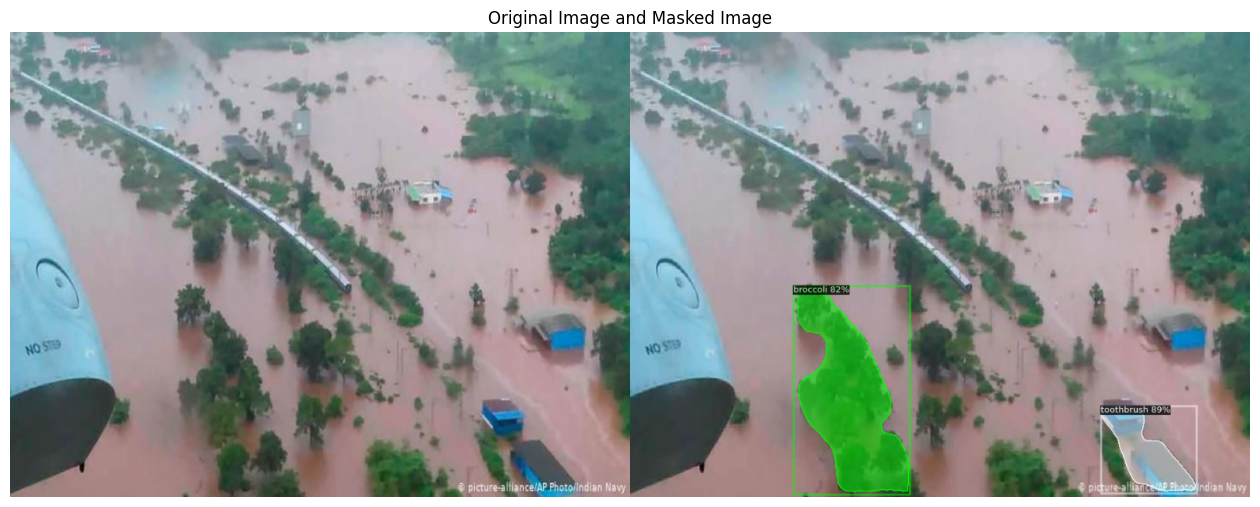

In [ ]:
# Masked R-CNN

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
import numpy as np
import matplotlib.pyplot as plt

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

# Load and resize image
image_path = r"C:\Users\pacay\OneDrive\Documents\disaster\datasets\AIDER\flooded_areas\flood_image0001.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 600))  # Resize to reduce GPU memory usage
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Config for Mask R-CNN using GPU
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for predictions
cfg.MODEL.DEVICE = "cuda"  # Use GPU

predictor = DefaultPredictor(cfg)

# Predict
outputs = predictor(image)

# Visualize predictions
v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
masked_image = out.get_image()
masked_image_resized = cv2.resize(masked_image, (image_rgb.shape[1], image_rgb.shape[0]))

# Combine and show
combined_image = np.hstack((image_rgb, masked_image_resized))
plt.figure(figsize=(16, 8))
plt.imshow(combined_image)
plt.axis('off')
plt.title("Original Image and Masked Image")
plt.show()